In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [3]:
matches.shape

(816, 17)

In [4]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
# Number of matches won by each team
pd.value_counts(matches['winner'])

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [6]:
matches['winner'] = matches['winner'].str.replace("Supergiants","Supergiant")

In [7]:
pd.value_counts(matches['winner'])

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [9]:
pd.value_counts(matches['player_of_match']).head()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

In [10]:
winners = pd.value_counts(matches['winner'])

In [11]:
winners.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Delhi Capitals', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype='object')

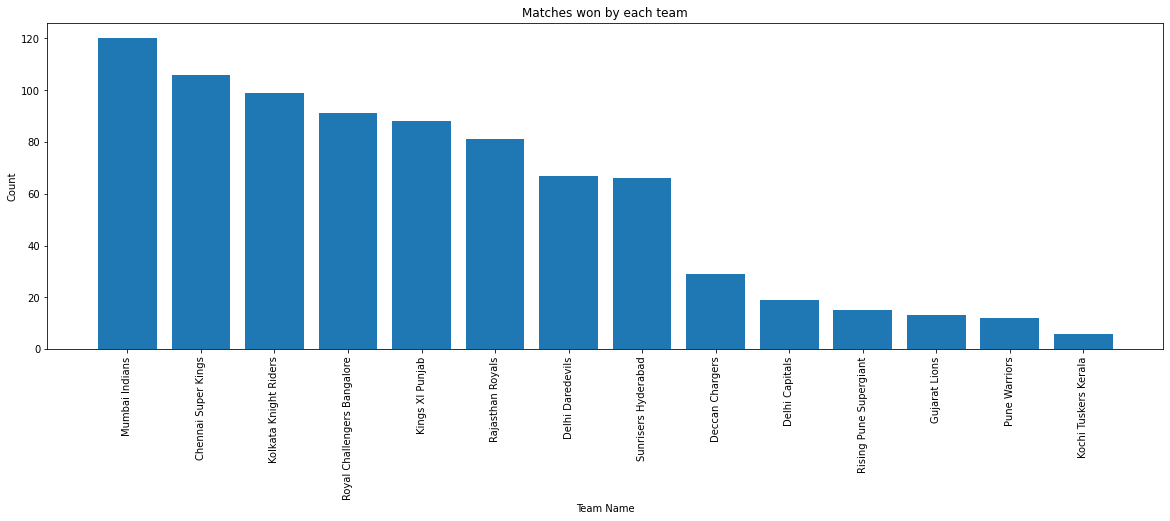

In [17]:
plt.figure(figsize=(20,6))
plt.bar(winners.index, winners)
plt.xticks(rotation='vertical')
# plt.xticks(rotation=45)
plt.title("Matches won by each team")
plt.xlabel("Team Name")
plt.ylabel("Count")
plt.show()

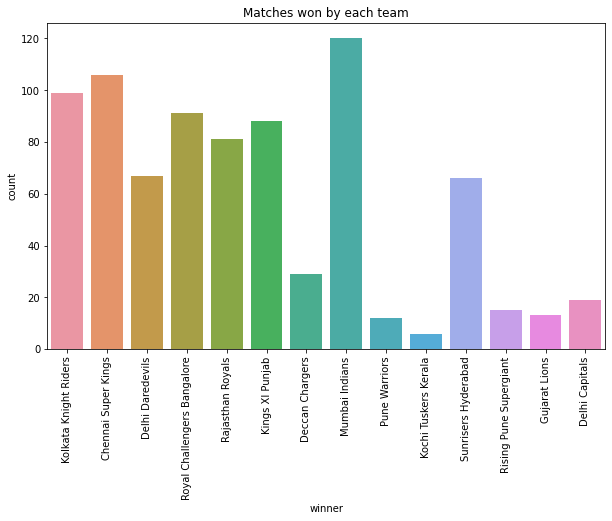

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='winner', data=matches)
plt.title("Matches won by each team")
plt.xticks(rotation='vertical')
plt.show()

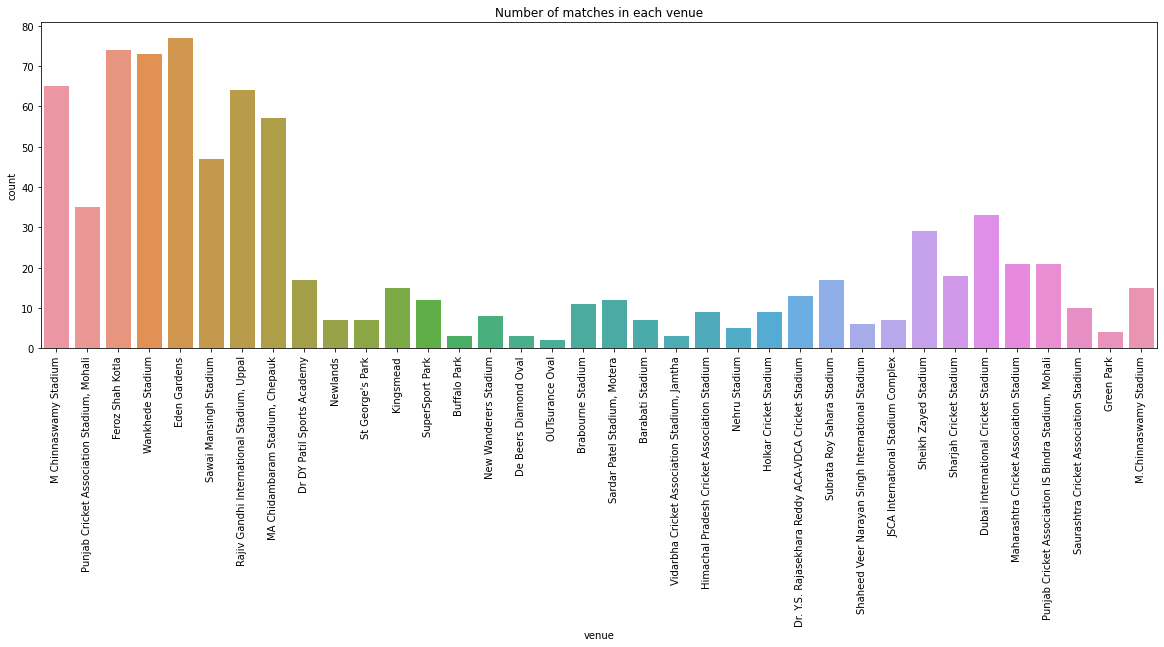

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x='venue', data=matches)
plt.title("Number of matches in each venue")
plt.xticks(rotation='vertical')
plt.show()

In [24]:
matches['date'].dtype

dtype('O')

In [25]:
matches['date'][0]

'2008-04-18'

In [26]:
matches['date'] = pd.to_datetime(matches['date'])

In [27]:
matches['date'].dtype

dtype('<M8[ns]')

In [28]:
matches['date'][0]

Timestamp('2008-04-18 00:00:00')

In [29]:
matches['season'] = pd.to_datetime(matches['date']).dt.year

In [30]:
pd.value_counts(matches['season'])

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

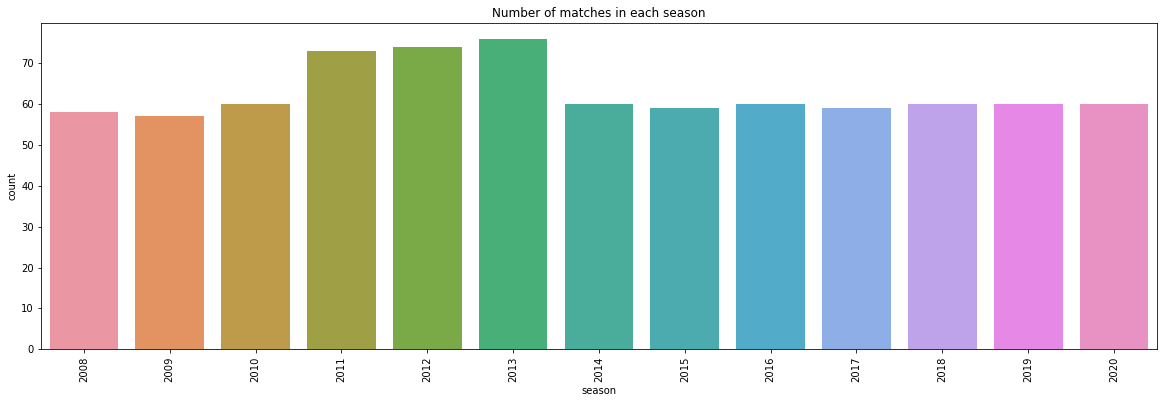

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(x='season', data=matches)
plt.title("Number of matches in each season")
plt.xticks(rotation='vertical')
plt.show()

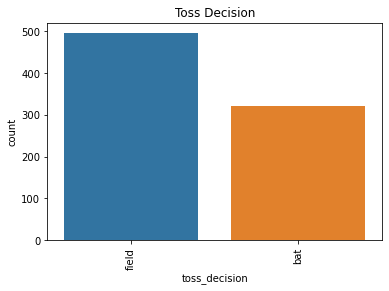

In [32]:
sns.countplot(x='toss_decision', data=matches)
plt.title("Toss Decision")
plt.xticks(rotation='vertical')
plt.show()

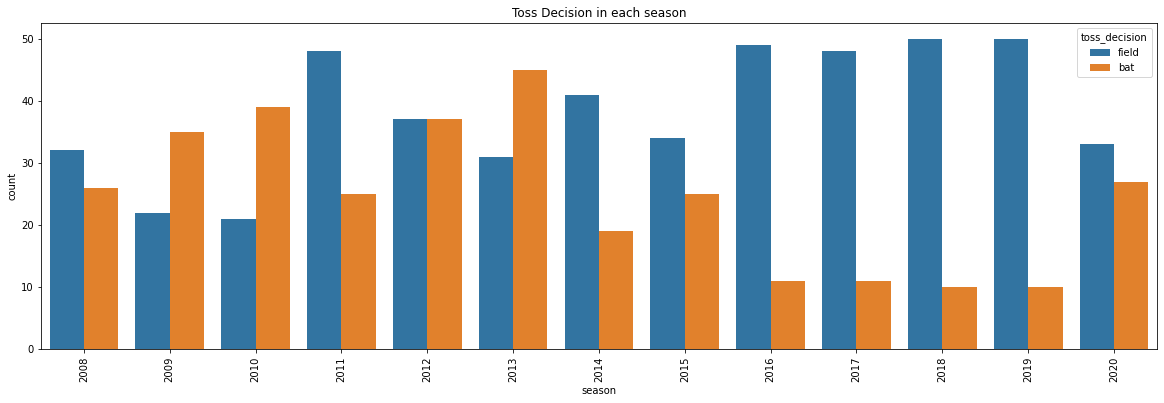

In [34]:
plt.figure(figsize=(20,6))
sns.countplot(x='season', data=matches, hue='toss_decision')
plt.title("Toss Decision in each season")
plt.xticks(rotation='vertical')
plt.show()

In [35]:
ball_by_ball = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [36]:
ball_by_ball.shape

(193468, 18)

In [37]:
ball_by_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [38]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [39]:
sixes_df = ball_by_ball[ball_by_ball['batsman_runs'] == 6]

In [40]:
sixes_df.shape

(8902, 18)

In [43]:
pd.value_counts(sixes_df['batsman']).head()

CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
Name: batsman, dtype: int64

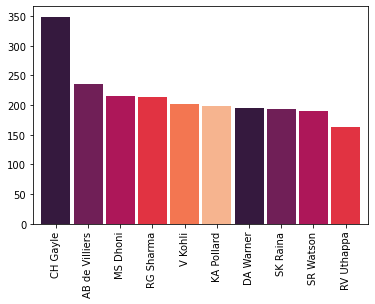

In [54]:
pd.value_counts(sixes_df['batsman']).head(10).plot.bar(width=0.9, color=sns.color_palette("rocket"))
plt.show()

In [57]:
wickets_df = ball_by_ball.dropna(subset=['player_dismissed'])

In [58]:
wickets_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
32,335982,1,12,1,RT Ponting,BB McCullum,JH Kallis,0,0,0,0,1,caught,RT Ponting,P Kumar,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
64,335982,1,17,1,DJ Hussey,BB McCullum,AA Noffke,0,0,0,0,1,caught,DJ Hussey,CL White,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
112,335982,1,5,2,SC Ganguly,BB McCullum,Z Khan,0,0,0,0,1,caught,SC Ganguly,JH Kallis,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
132,335982,2,7,5,MV Boucher,CL White,SC Ganguly,0,0,0,0,1,caught,MV Boucher,M Kartik,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
135,335982,2,8,2,B Akhil,CL White,AB Agarkar,0,0,0,0,1,caught,B Akhil,RT Ponting,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [59]:
wickets_df.shape

(9495, 18)

In [60]:
pd.unique(wickets_df['dismissal_kind'])

array(['caught', 'run out', 'bowled', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [63]:
wickets_df = wickets_df[(wickets_df['dismissal_kind'] != 'run out')]

In [64]:
pd.unique(wickets_df['dismissal_kind'])

array(['caught', 'bowled', 'lbw', 'retired hurt', 'stumped',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [65]:
wickets_df = wickets_df[(wickets_df['dismissal_kind'] != 'retired hurt')]

In [66]:
pd.unique(wickets_df['dismissal_kind'])

array(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled',
       'hit wicket', 'obstructing the field'], dtype=object)

In [67]:
wickets_df.shape

(8591, 18)

In [68]:
pd.value_counts(wickets_df['bowler'])

SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
                  ... 
AA Noffke            1
SS Sarkar            1
AM Rahane            1
LA Carseldine        1
JR Hazlewood         1
Name: bowler, Length: 360, dtype: int64

In [69]:
# highest scorer
# most runs in IPL
# most catches taken by a fielder